In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

In [11]:
rozrzut = 10.0       
wsp_przyrostu = 1.1    
l_iteracji = 100        
zakres_zmiennosci = (-100.0, 100.0) 

In [12]:
def fitness(x):
    return math.sin(x / 10.0) * math.sin(x / 200.0)

In [13]:
random.seed(42)
x = random.uniform(*zakres_zmiennosci)
y = fitness(x)

historia = []
historia.append([0, x, y, rozrzut])

print(f"{'Iteracja':>8} | {'x':>10} | {'y':>12} | {'rozrzut':>10}")
print("-" * 50)
print(f"{0:8d} | {x:10.6f} | {y:12.8f} | {rozrzut:10.6f}")

Iteracja |          x |            y |    rozrzut
--------------------------------------------------
       0 |  27.885360 |   0.04805322 |  10.000000


In [14]:
for i in range(1, l_iteracji + 1):
    xpot = x + random.uniform(-rozrzut, rozrzut)
    xmin, xmax = zakres_zmiennosci
    if xpot < xmin:
        xpot = xmin
    elif xpot > xmax:
        xpot = xmax

    ypot = fitness(xpot)

    if ypot >= y:
        x = xpot
        y = ypot
        rozrzut *= wsp_przyrostu 
    else:
        rozrzut /= wsp_przyrostu 

    historia.append([i, x, y, rozrzut])

    print(f"{i:8d} | {x:10.6f} | {y:12.8f} | {rozrzut:10.6f}")

       1 |  18.385575 |   0.08852727 |  11.000000
       2 |  18.385575 |   0.08852727 |  10.000000
       3 |  18.385575 |   0.08852727 |   9.090909
       4 |  18.385575 |   0.08852727 |   8.264463
       5 |  21.306227 |   0.09009823 |   9.090909
       6 |  21.306227 |   0.09009823 |   8.264463
       7 |  21.306227 |   0.09009823 |   7.513148
       8 |  20.133002 |   0.09081563 |   8.264463
       9 |  20.133002 |   0.09081563 |   7.513148
      10 |  20.133002 |   0.09081563 |   6.830135
      11 |  20.206156 |   0.09082612 |   7.513148
      12 |  20.206156 |   0.09082612 |   6.830135
      13 |  20.206156 |   0.09082612 |   6.209213
      14 |  20.206156 |   0.09082612 |   5.644739
      15 |  20.206156 |   0.09082612 |   5.131581
      16 |  20.206156 |   0.09082612 |   4.665074
      17 |  20.206156 |   0.09082612 |   4.240976
      18 |  20.206156 |   0.09082612 |   3.855433
      19 |  20.206156 |   0.09082612 |   3.504939
      20 |  20.206156 |   0.09082612 |   3.186308


In [15]:
df = pd.DataFrame(historia, columns=["Iteracja", "x", "y", "rozrzut"])

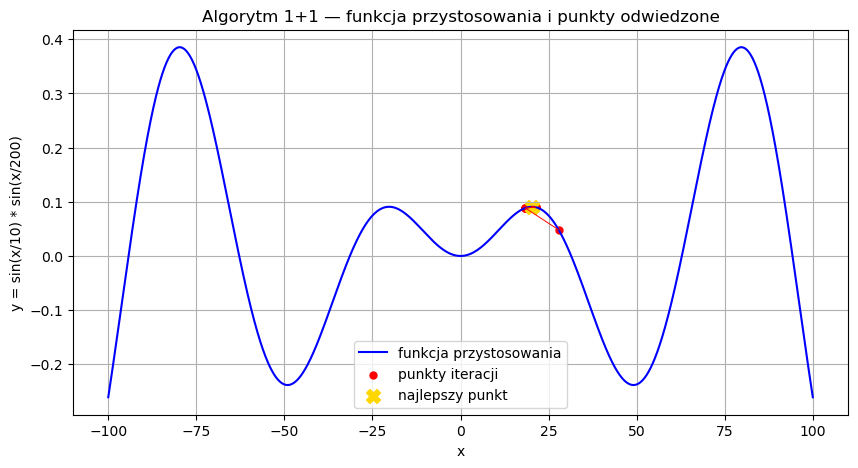

In [16]:
xs = np.linspace(*zakres_zmiennosci, 2000)
ys = np.sin(xs / 10.0) * np.sin(xs / 200.0)

plt.figure(figsize=(10, 5))
plt.plot(xs, ys, label="funkcja przystosowania", color="blue")
plt.scatter(df["x"], df["y"], color="red", s=25, label="punkty iteracji")
plt.plot(df["x"], df["y"], color="red", linewidth=0.7)
best_idx = df["y"].idxmax()
plt.scatter(df.loc[best_idx, "x"], df.loc[best_idx, "y"], 
            color="gold", s=100, marker="X", label="najlepszy punkt")
plt.title("Algorytm 1+1 — funkcja przystosowania i punkty odwiedzone")
plt.xlabel("x")
plt.ylabel("y = sin(x/10) * sin(x/200)")
plt.grid(True)
plt.legend()
plt.show()

In [18]:
best = df.loc[df["y"].idxmax()]
print("\nNajlepszy znaleziony wynik:")
print(f"Iteracja: {int(best['Iteracja'])}")
print(f"x = {best['x']:.6f}")
print(f"y = {best['y']:.8f}")
print(f"rozrzut = {best['rozrzut']:.6f}")


Najlepszy znaleziony wynik:
Iteracja: 80
x = 20.276395
y = 0.09082942
rozrzut = 0.027143
